# Assignment 3
## Sungwon Lee
### 017473950

# 1. (5 pts) Linear regression with gradient decent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv("housing.csv")
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [2]:
# feature scailing

Y = df.iloc[:, :1]
X = df.iloc[:, 1:]

X_copy = X.copy()

strlist = ["driveway", "recroom", "fullbase", "gashw", "airco", "prefarea"]
intlist = ["lotsize", "bedrooms", "bathrms", "stories", "garagepl"]
X_copy[strlist] = X_copy[strlist].map(lambda x : 1 if x == "yes" else 0)
X_copy[intlist] = (X_copy[intlist] - X_copy[intlist].mean())/X_copy[intlist].std()
X_normalized = X_copy
X_normalized.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.322732,0.047192,-0.568973,0.221501,1,0,1,0,0,0.357239,0
1,-0.530526,-1.308947,-0.568973,-0.930304,1,0,0,0,0,-0.803788,0
2,-0.964074,0.047192,-0.568973,-0.930304,1,0,0,0,0,-0.803788,0
3,0.691709,0.047192,-0.568973,0.221501,1,1,0,0,0,-0.803788,0
4,0.557955,-1.308947,-0.568973,-0.930304,1,0,0,0,0,-0.803788,0


## 1-1. (3pts) Please build a gradient descent algorithm based on the following formulas.

In [3]:
def gradient_descent_sum_form(X, Y, lr, num_iter):
    X["intercept"] = 1
    initial_weight = np.random.normal(0, 0.01, len(X.columns))  
    

    X = np.array(X)
    Y = np.array(Y).flatten() 
    
    m = len(Y)  
    # Gradient Descent
    for iteration in range(num_iter):
        
        gradient = np.zeros_like(initial_weight)
        cost_func = 0

        for i in range(m):
            y_pred = np.dot(X[i], initial_weight)
            error = y_pred - Y[i]
            gradient += error * X[i]
            cost_func += error ** 2
        
        cost_func = 2 * cost_func / m
        initial_weight -= lr * gradient / m
        rmse = np.sqrt(cost_func)
        
        if iteration <= 9:
            print(f"Epoch {iteration + 1}, RMSE: {rmse}")

    y_final_pred = X.dot(initial_weight)    
    return y_final_pred

Epoch 1, RMSE: 103462.80428010531
Epoch 2, RMSE: 101307.25967139851
Epoch 3, RMSE: 99202.36499829267
Epoch 4, RMSE: 97147.04305485605
Epoch 5, RMSE: 95140.24098760339
Epoch 6, RMSE: 93180.9297210118
Epoch 7, RMSE: 91268.10339338864
Epoch 8, RMSE: 89400.7788027763
Epoch 9, RMSE: 87577.99486258598
Epoch 10, RMSE: 85798.81206666864


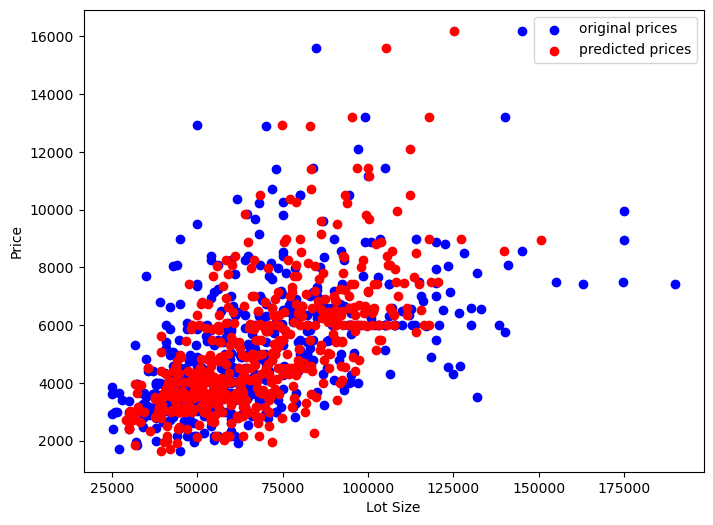

In [7]:
y_pred = gradient_descent_sum_form(X_normalized, Y, lr=0.01, num_iter=5000)

plt.figure(figsize=(8,6))
plt.scatter(Y, X.lotsize, c = 'blue', label = "original prices")
plt.scatter(y_pred_sum_form, X.lotsize, c = 'red', label = "predicted prices")
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.legend()

plt.show()

In [8]:
def r2_score(Y, y_pred):
    Y = np.array(Y).flatten()
    sst = np.sum((Y - Y.mean()) **2)
    ssr = np.sum((Y - y_pred.flatten()) ** 2)
    r2 = 1 - (ssr/sst)
    return r2

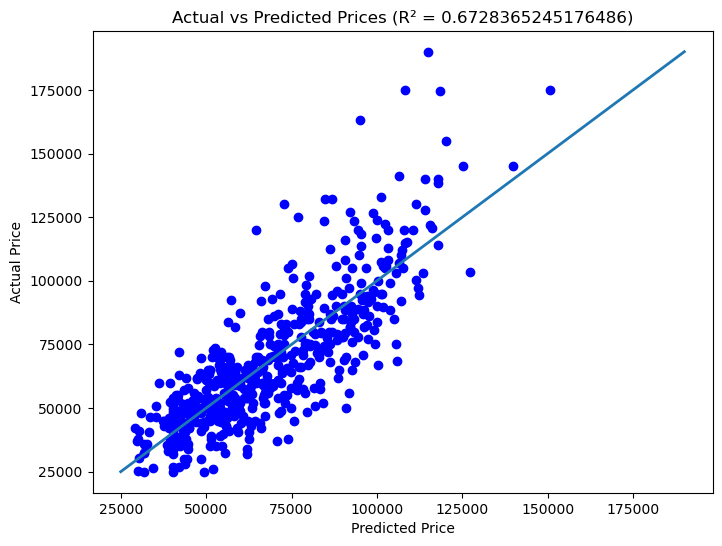

In [9]:
r2 = r2_score(Y, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, Y, color='blue')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], '-', lw=2)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title(f"Actual vs Predicted Prices (R² = {r2})")
plt.show()

## 1-2. (3pts) Please build a gradient descent algorithm based on the following formulas.

In [10]:

def gradient_descent(X, Y, lr, num_iter):
    np.random.seed(240)
    # add initial bias 
    X["intercept"] = 1
    initial_weight = np.random.normal(0, 0.01, len(X.columns))
    X = np.array(X)
    Y = np.array(Y)
    for iteration in range(num_iter):
        y_pred = X.dot(initial_weight)
        # gradient = X.T.dot((y_pred - Y.flatten())) / len(Y)
        gradient = 2 * (y_pred - Y.flatten()).T.dot(X) / len(Y)
        cost_func = np.mean((y_pred - np.array(Y))**2)
        initial_weight -= lr * gradient
        rmse = np.sqrt(cost_func)

        if iteration <= 9:

            print(f"Epoch : {iteration + 1}, RMSE : {rmse}")

        else:
            continue

    y_final_pred = X.dot(initial_weight)

    return y_final_pred

In [11]:
y_pred = gradient_descent(X_normalized, Y, lr = 0.01, num_iter = 5000)

Epoch : 1, RMSE : 73159.25637838492
Epoch : 2, RMSE : 70459.28421896425
Epoch : 3, RMSE : 67913.5343754607
Epoch : 4, RMSE : 65515.75819750372
Epoch : 5, RMSE : 63259.9063629036
Epoch : 6, RMSE : 61140.1105041327
Epoch : 7, RMSE : 59150.66611990317
Epoch : 8, RMSE : 57286.016982281864
Epoch : 9, RMSE : 55540.74124845557
Epoch : 10, RMSE : 53909.53947255723


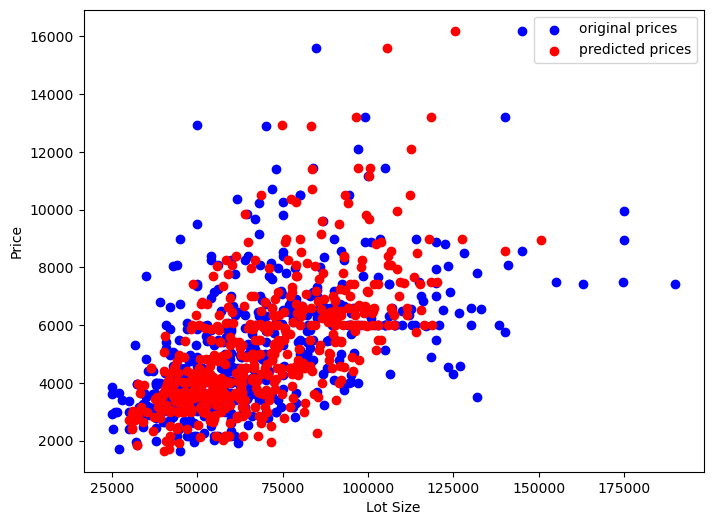

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(Y, X.lotsize, c = 'blue', label = "original prices")
plt.scatter(y_pred, X.lotsize, c = 'red', label = "predicted prices")
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.legend()

plt.show()

In [13]:
def r2_score(Y, y_pred):
    Y = np.array(Y).flatten()
    sst = np.sum((Y - Y.mean()) **2)
    ssr = np.sum((Y - y_pred.flatten()) ** 2)
    r2 = 1 - (ssr/sst)
    return r2

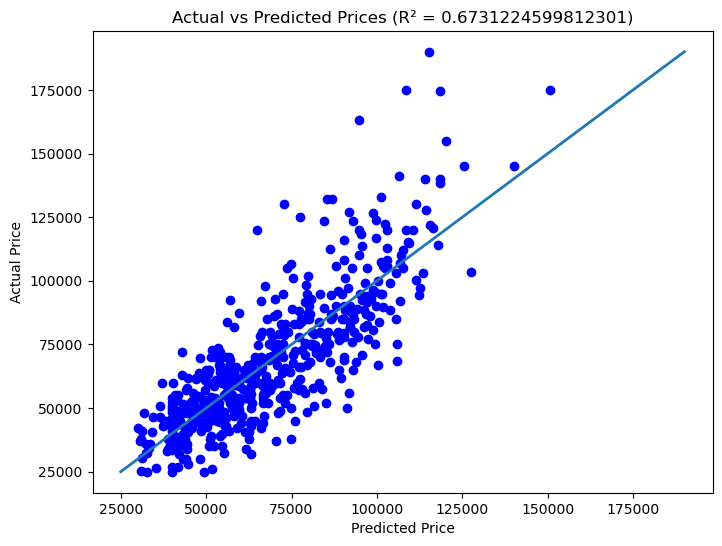

In [15]:
r2 = r2_score(Y, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, Y, color='blue')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], '-', lw=2)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title(f"Actual vs Predicted Prices (R² = {r2})")
plt.show()

# 2. (5 pts) Binary classification with logistic regression

In [1]:
import pandas as pd
import numpy as np

heart_train = pd.read_csv("heart_disease_train.csv")
heart_test = pd.read_csv("heart_disease_test.csv")

In [2]:
print(heart_train.shape)
heart_train.head()

(3390, 16)


,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [3]:
print(heart_test.shape)
heart_test.head()

(848, 16)


,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1


In [4]:
# null values
heart_train.isnull().sum()

gender               0
age                  0
education           84
currentSmoker        0
cigsPerDay          25
BPMeds              42
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             44
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            315
TenYearCHD           0
dtype: int64

array([[<Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>],
       [<Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>],
       [<Axes: title={'center': 'glucose'}>, <Axes: >, <Axes: >]],
      dtype=object)

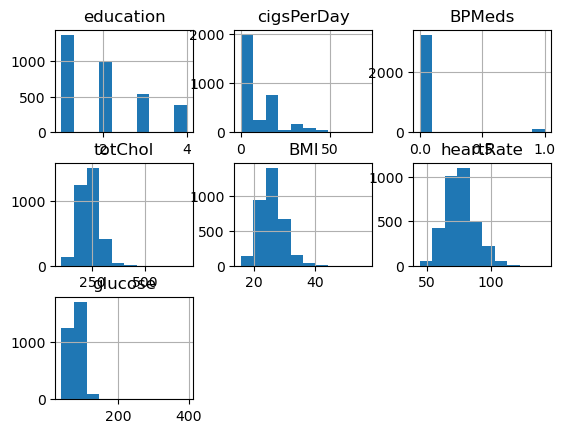

In [5]:
missinglist = ["education", "cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]
heart_train[missinglist].hist()

Since all these columns are pretty skewed, we will use median to impute the missing value for each sublcass. 

In [6]:
heart_train[missinglist] = heart_train[missinglist].apply(lambda x : x.fillna(x.median()), axis=0)
heart_test[missinglist] = heart_test[missinglist].apply(lambda x : x.fillna(x.median()), axis=0)

In [7]:
heart_train.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
heart_test.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
# Normalize
y_train = heart_train.TenYearCHD.values
x_train = heart_train.iloc[:, :-1]
y_test = heart_test.TenYearCHD.values
x_test = heart_test.iloc[:, :-1]

x_train = (x_train - x_train.mean()) / x_train.std()
x_test = (x_test - x_test.mean()) / x_test.std()
x_train.insert(0, 'intercept', 1)  
x_test.insert(0, 'intercept', 1)  

In [10]:
x_train.head()

,intercept,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,1.142689,1.554755,-0.971745,-0.973651,-0.740723,-0.169774,-0.068853,1.519824,-0.159376,-1.036933,0.719949,0.607343,0.331466,-0.315983,0.190613
1,1,1.142689,-0.535931,1.007952,-0.973651,-0.740723,-0.169774,-0.068853,-0.657777,-0.159376,-1.658418,-0.323238,0.523548,0.542060,0.771852,0.059178
2,1,-0.874871,0.160964,-0.971745,1.026759,-0.574202,-0.169774,-0.068853,-0.657777,-0.159376,0.538973,-0.232526,-0.146815,-1.375582,-0.064944,0.628729
3,1,1.142689,-0.535931,1.007952,1.026759,1.757090,-0.169774,-0.068853,-0.657777,-0.159376,0.294819,-0.277882,0.565446,0.715490,-0.064944,0.453482
4,1,-0.874871,-0.535931,0.018103,1.026759,-0.490942,-0.169774,-0.068853,-0.657777,-0.159376,0.294819,-0.096458,-0.230610,-1.375582,1.190250,0.190613


In [11]:
np.random.seed(240)
initial_weight = np.random.normal(0, 0.01, x_train.shape[1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(initial_weight, X, y):
    l = sigmoid(X.dot(initial_weight))
    return -np.mean(y * np.log(l) + (1 - l) * np.log(1 - l))

def gradient_descent(initial_weight, X, y, lr, num_iter):
    for i in range(num_iter):
        prediction = sigmoid(X.dot(initial_weight))
        gradient = X.T.dot(prediction - y) / len(y)
        initial_weight -= lr * gradient

        if i < 10:
            cost = loss(initial_weight, X, y)
            print(f"Epoch : {i + 1}, loss : {cost}")

    return initial_weight

# X = np.array(x_train)
# y = np.array(y_train)

# result = gradient_descent(initial_weight, X, y, lr=0.01, num_iter=1000)

In [12]:
def predict(X, weights, threshold=0.5):
    probabilities = sigmoid(X.dot(weights))
    return (probabilities >= threshold).astype(int)

In [13]:
# Convert to numpy arrays
X_train = np.array(x_train)
X_test = np.array(x_test)

final_weights = gradient_descent(initial_weight, X_train, y_train, lr=0.01, num_iter=10)

y_train_pred = predict(X_train, final_weights)
y_test_pred = predict(X_test, final_weights)

Epoch : 1, loss : 0.4515911043126246
Epoch : 2, loss : 0.45146130688346925
Epoch : 3, loss : 0.4513305787929479
Epoch : 4, loss : 0.45119894412545697
Epoch : 5, loss : 0.4510664266100059
Epoch : 6, loss : 0.4509330496228813
Epoch : 7, loss : 0.45079883619038347
Epoch : 8, loss : 0.45066380899162906
Epoch : 9, loss : 0.4505279903614184
Epoch : 10, loss : 0.4503914022931603


In [14]:
# Confusion matrix and metrics calculation
def confusion_matrix_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    # Confusion matrix
    confusion_matrix = np.array([[tn, fp],
                                 [fn, tp]])
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    
    return confusion_matrix, accuracy, precision, recall
    
    
    
# for i in range(len(true)):
    # if pred[i] == true[i]:
            # tp += 1
        
        

# Calculate metrics for training set
train_confusion_matrix, train_accuracy, train_precision, train_recall = confusion_matrix_metrics(y_train, y_train_pred)

# Calculate metrics for test set
test_confusion_matrix, test_accuracy, test_precision, test_recall = confusion_matrix_metrics(y_test, y_test_pred)

print()
print("Train Evaluation")
print("Confusion Matrix:")
print(train_confusion_matrix)
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")

print()
print("Test Evaluation")
print("Confusion Matrix:")
print(test_confusion_matrix)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")


Train Evaluation
Confusion Matrix:
[[2424  450]
 [ 359  157]]
Accuracy: 0.7613569321533923
Precision: 0.2586490939044481
Recall: 0.30426356589147285

Test Evaluation
Confusion Matrix:
[[619 101]
 [ 82  46]]
Accuracy: 0.7841981132075472
Precision: 0.3129251700680272
Recall: 0.359375


In [25]:
tempdf_train = pd.read_csv("heart_disease_train.csv")
tempdf_test = pd.read_csv("heart_disease_test.csv")

tempdf_train[missinglist] = tempdf_train[missinglist].apply(lambda x : x.fillna(x.median()), axis=0)

tempdf_test[missinglist] = tempdf_test[missinglist].apply(lambda x : x.fillna(x.median()), axis=0)

In [36]:
x_train = tempdf_train.iloc[:, :-1]
y_train = tempdf_train.iloc[:, -1]

x_test = tempdf_test.iloc[:, :-1]
y_test = tempdf_test.iloc[:, -1]


x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score

clf = LogisticRegression().fit(x_train, y_train)
y_pred = clf.predict(x_test)

confusion_matrix(y_pred, y_test) 
recall_score(y_test, y_pred)

0.0625

In [37]:
confusion_matrix(y_pred, y_test) 

array([[716, 120],
       [  4,   8]])